# EG Starcraft Player Analysis Assessment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#import data and looking at head
df = pd.read_csv('starcraft_player_data.csv')
df.head()


,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [2]:
#We need to first understand the data and how rank is roughly affected by our various metrics, so we will begin by reorganizing
#the data to reflect the player's rank

## (COULD ALSO DO CLEANING HERE FIRST), but data seems to be rather clean in this set
df.sort_values(by='LeagueIndex', ascending=False, inplace=True)
df.head(90)

# df['LeagueIndex'].value_counts(ascending=False)
# print(len(df))

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
3394,10095,8,?,?,?,348.3576,0.029855,0.000811,4,0.000224,0.001315,0.005566,20.0537,33.5142,6.3719,27,0.001566,7,0.000457,0.000895
3369,10059,8,?,?,?,219.3894,0.005926,0.000741,6,0.000440,0.000709,0.005185,17.0456,30.5342,6.6749,35,0.002072,9,0.000225,0.000064
3367,10052,8,?,?,?,190.2396,0.008720,0.000879,10,0.000171,0.000342,0.004971,17.9901,35.9509,5.5872,21,0.000904,5,0.000000,0.000000
3366,10051,8,?,?,?,269.8998,0.024645,0.000642,10,0.000415,0.000491,0.004015,25.6352,43.3856,6.4922,21,0.000478,6,0.000000,0.000579
3365,10050,8,?,?,?,211.9188,0.019817,0.000633,4,0.000201,0.000201,0.003912,31.8222,54.5588,5.0294,14,0.001409,3,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,72,7,17,42,10000,212.6022,0.009040,0.000676,6,0.001164,0.001253,0.004952,24.6117,41.7671,6.6104,45,0.002277,9,0.000129,0.000249
1073,3091,7,25,10,900,178.8342,0.015910,0.000391,7,0.000141,0.000308,0.004792,34.6810,46.2276,3.8166,36,0.000706,10,0.000000,0.000090
1627,4699,7,23,14,750,166.5456,0.006804,0.000361,6,0.000764,0.000605,0.004065,18.4845,49.2562,6.1219,26,0.000664,7,0.000000,0.000000
1090,3125,7,21,8,400,157.6344,0.008552,0.000698,9,0.000013,0.000577,0.004659,22.4855,48.5764,4.5130,25,0.000712,6,0.000000,0.000000


Looking at the top end of our dataset, one can immediately notice that the pro players' data does not include Age, Hours Per Week or Total Hours. While one can write a function to recognize this (i.e. run statistics on each of the league ranks and notice an error on those metrics for rank 8), we can simply notice them early on and focus our analysis elsewhere (we can always return and exclude pro players, but that would be separate from our assessment). 

If one were to include rank 8 players, it would be necessary to use a function such as df.fillna(), but given our lack of information, I will elect to use the other metrics. 

Text(0.5, 1.0, 'Distribution Of Ranks')

<Figure size 432x288 with 0 Axes>

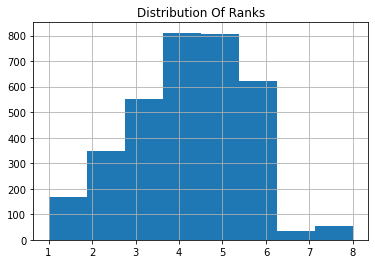

In [3]:
## To visualize the distribution of our sample looks like across player rank

plt.figure()
df.hist(column = 'LeagueIndex', bins = 8)
plt.title("Distribution Of Ranks")


From this visualization, we can easily see that a majority of our players seem to be averaged around rank 4, however, to properly predict our top level players, we need to focus directly on our upper range. Here we can work to understand the statistics of top performers then apply a set of qualifications to the overall dataset to re-predict ranks.

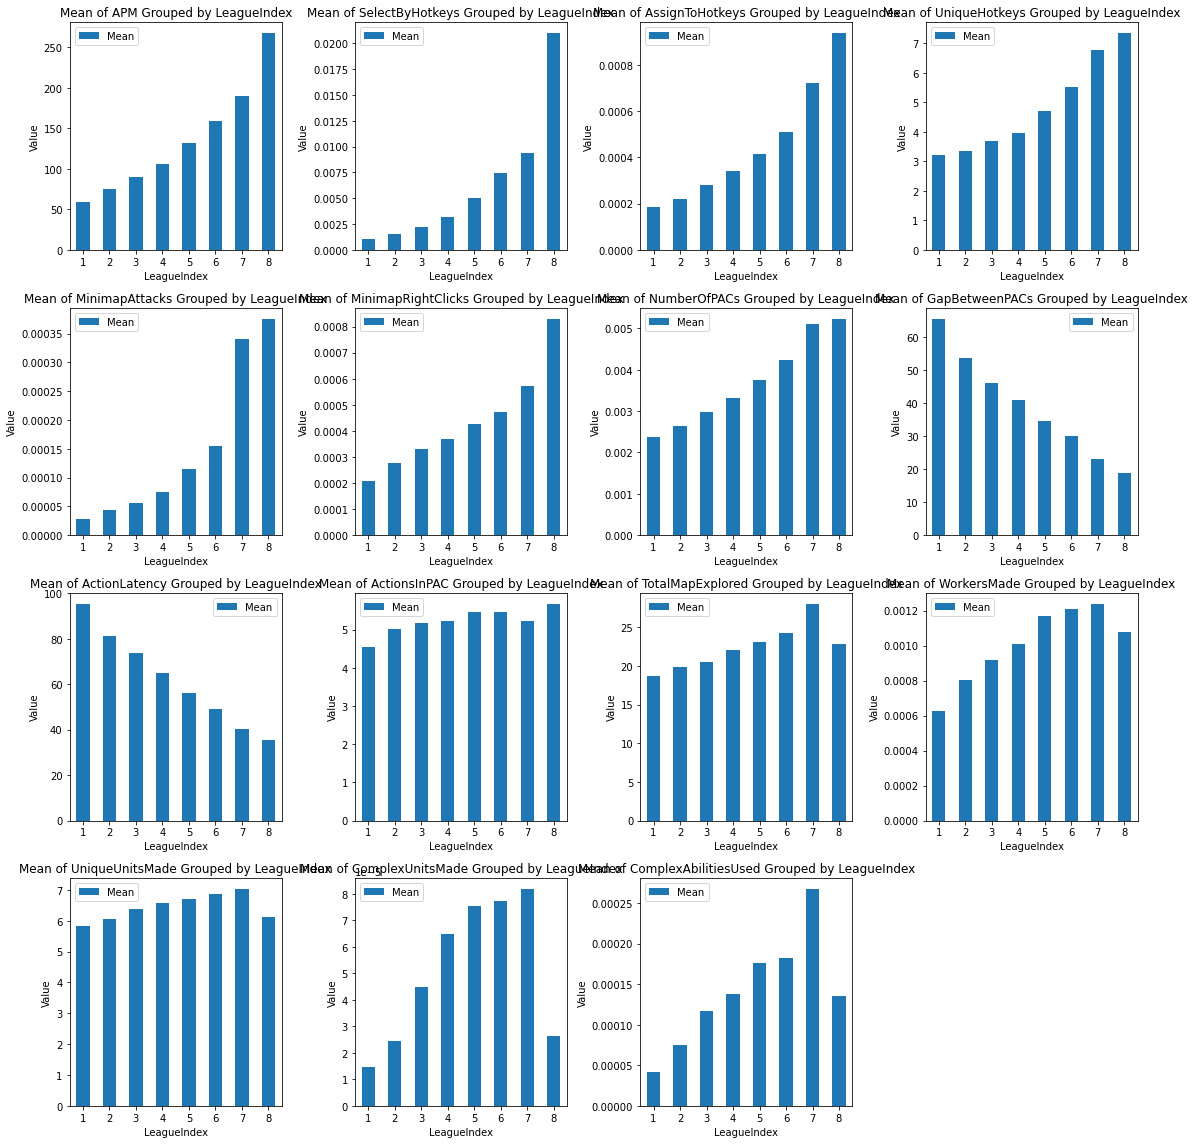

In [4]:
## Here we look to understand the statistics within a given league rank. From here, I hope to be able to determine a method
## of each of the league ranks. 

# Defining metrics being graphed. One could swap out any of the following, but for our understanding we graph all of them.
metrics = ['APM', 'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks', 'MinimapRightClicks',
           'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency', 'ActionsInPAC', 'TotalMapExplored', 'WorkersMade',
           'UniqueUnitsMade', 'ComplexUnitsMade', 'ComplexAbilitiesUsed']

LeagueIndex_df = df.groupby(['LeagueIndex'])[metrics].agg([np.mean], [np.median])

## Let's make a visual representation of these statistics so it's a bit easier to understand where metrics are stagnant vs distinct. 
# Plot means for each metric

num_metrics = len(metrics)
num_rows = 4 
num_cols = -(-num_metrics // num_rows)  # Calculate the number of columns

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 16))
axes = axes.flatten()  # Flatten the 2D axes array to a 1D array

for i, metric in enumerate(metrics):
    ax = axes[i]
    LeagueIndex_df[metric].plot(kind='bar', rot=0, ax=ax)
    ax.set_title(f'Mean of {metric} Grouped by LeagueIndex')
    ax.set_xlabel('LeagueIndex')
    ax.set_ylabel('Value')
    ax.legend(['Mean'])

## For some reason, median isn't appearing. Might need to troubleshoot at some point.

## Need to clean up the end, so remove the last subplot
if num_metrics < len(axes):
    for j in range(num_metrics, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### We could take any of the above plots and do analysis, but even at a glance, one can begin to understand how some metrics are more distinct when it comes to League rank. For example, the entire first two rows show consistent (general) trends for the metrics as one increases in rank. 

From here what we want to do is identify which of the metrics play the greatest role in determining the difference between a rank 1 and a rank 8 player, then focus in on what will lead to a rank 6 player being different than a rank 7 and so on. What is rather interesting here is that in certain metrics (i.e. Total Map Explored, Workers Made, Complex Units Made, Complex Units Made), rank 7 players seem to differ greatly from pro players. 

As any gamer who has watched both professional play and ranked solo queue would know, there are certain styles of play which tend to be more prevalent in either situation. What may work in solo queue might almost never work in a professional setting and according to their environment, players of each level will adjust to what is "meta". Inherently, such a situation causes abnormalities within our data that are not directly quantifiable via data analysis, but it is good to understand qualitatively why such differences might appear.  

## There are a number of methods one could make use of to lead us to our solution. 

### Such methods might include:
     - ML Techniques (One could employ frameworks such as DNNs, GNNs to learn the 
     trends of the metrics to predict League Index)
     and then look at a separate large dataset to verify how the model has learned
     - Statistical Analysis of a given metric to learn the behavior at a deep level. Here 
     we could make use of regressions to properly predict rank
     - Creating a toy model with a selected set of metrics to give each player a score 
     based on their metrics compared to the average professional player and then reranking 
     them and comparing the difference from the given dataset. 
 
 ### For our analysis today, I will elect to make use of the last option, as it will give a simple understanding of our dataset. However, given more computing power and time, I would likely defer to the first or second option, as I imagine their predictive power would likely be greater

## Choice of Model 
### Given that my computer has limited resources in terms of computation and time to focus on this problem. I have elected to make use of what I will call a Model Player Score (MPS). 

MPS is based on a given player's difference from the average professional player's scores in the metrics where I have identified a clear trend between the ranks. Each player will start out with a score of 1, then their individual scores will be compared to the average score of a professional or professional player score (PPS). The variance from the PPS will be deducted from the starting value and the MPS value for a player will be compared to their League Index to understand this toy model's predictive power. 

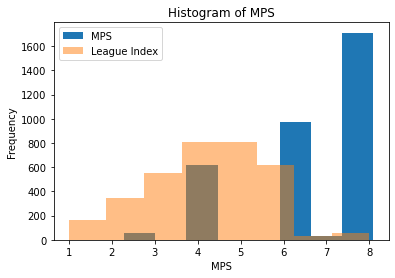

In [5]:
## We now define our selected metrics for MPS, this can easily be altered, but those chosen are included for 
## giving easy trends to follow while including the maximum number of metrics to ensure proper consideration is given. 

MPS_metrics =  ['APM', 'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks', 'MinimapRightClicks',
           'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency', 'ActionsInPAC']

# Calculate the average score of the professional player
pro_index = df['LeagueIndex'].max()
pro_index_avg = df[df['LeagueIndex'] == pro_index][MPS_metrics].mean()

# Now calculate variances from professional player
variances = df.groupby('LeagueIndex')[metrics].var().abs()
variances = variances.subtract(pro_index_avg, axis=1).abs()

# Initialize MPS with a value of 1 for all players
df['MPS'] = 1

# Iterate over each player and subtract the absolute value of the variance from their MPS
for index, row in df.iterrows():
    league_index = row['LeagueIndex']
    player_variances = variances.loc[league_index]
    mps_reduction = player_variances.sum()
    normalized_mps_reduction = mps_reduction / pro_index_avg.sum()
    df.at[index, 'MPS'] =- normalized_mps_reduction + 11 # This factor exists as a phase shift for our MPS to move it over to league index

# Plotting Histogram with the same number of bins as the initial division of players in LeagueIndex
plt.hist(df['MPS'], bins=8, label = 'MPS')
plt.hist(df['LeagueIndex'], bins=8, alpha = 0.5, label = 'League Index')
plt.title('Histogram of MPS')
plt.legend()
plt.xlabel('MPS')
plt.ylabel('Frequency')
plt.show()

## Results

What is truly interesting here is not the actual value of MPS, but rather the morphology of MPS versus the League Index from our dataset. MPS clearly over predicts top rank players, but what I find truly interesting is the inversion almost. If I had more time to look at the process, I believe that one would find that MPS is actually inverting the player base. Something about how the score is being calculated is causing more players to seem closer to professional player caliber in metrics. 

To understand this more deeply, I plan to look over the metrics more closely and understand the variance within a given rank rather than the averages. I would have added uncertainty to each of these graphs, but ran out of time as this week was rather busy. 

## Moving forward

It would be necessary to look at this calculation more closely to determine a model that more closely mimics the behavior of the dataset. Given more data, it would be possible to tune it more finely such that the differences between even rank 7 and rank 8 players could be understood (this process would likely focus directly on comparing those sets of players to understand the nuance of top level solo queue and professional play. Finally, all of the functions utilized (plotting, variances, etc) would be converted into python functions so that they could simply be called given a dataset, regardless of size. 

I think it would also be quite interesting to see how a deep neural network would handle learning the league index with a different number of metric inputs. One could then compare the toy model, MPS, against that of the AI/ML methodology, which could likely recognize a pattern more clearly. 

My advice from this study would be to first study the players ranked 1 through 7 with the exclusion of professional players so more metrics could be included. Then separately one could study the transition from ranked to professional play to quantify the differences in mechanical skill and see how the variances within each division carry over. 

It is my belief that the data visualization shown quite clearly shows trends and with the inclusion of more data, trends will only become more and more defined, especially within the metrics chosen for MPS. 